# US-Accidents

In [1]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od
download_url = "https://www.kaggle.com/sobhanmoosavi/us-accidents?select=US_Accidents_Dec20_Updated.csv"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: deetchanal
Your Kaggle Key: ········


  0%|          | 1.00M/290M [00:00<00:38, 7.81MB/s]

100%|██████████| 290M/290M [00:38<00:00, 7.87MB/s] 


In [3]:
dataset='./us-accidents/US_Accidents_Dec20_Updated.csv'

# Data Preperation and Cleaning

In [43]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df=pd.read_csv(dataset)

In [8]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [10]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [13]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [18]:
numeric = ['float16','float32','float64','int16','int32','int64']
numeric_df = df.select_dtypes(include=numeric)
len(numeric_df.columns)

14

In [25]:
missing_percent = df.isna().sum().sort_values(ascending=False)/len(df)
missing_percent

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

<AxesSubplot:>

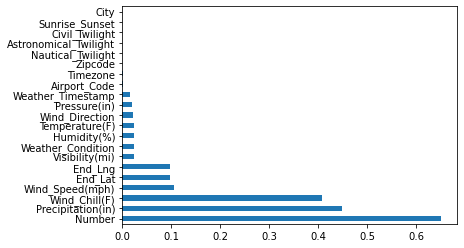

In [29]:
missing_percent[missing_percent != 0].plot(kind='barh')

# Exploratory Analysis and Visualization

In [32]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [34]:
df.City

0                Greenville
1                 Charlotte
2                 Los Gatos
3               Carson City
4           Fort Lauderdale
                 ...       
2906605             Houston
2906606              Colton
2906607               Miami
2906608      Salt Lake City
2906609    Colorado Springs
Name: City, Length: 2906610, dtype: object

In [35]:
cities = df.City.unique()
len(cities)

11790

In [36]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles        68411
Houston            68265
Charlotte          56176
Miami              49965
Dallas             48525
                   ...  
Elroy                  1
Honoraville            1
Singers Glen           1
Lowndesville           1
Horseshoe Beach        1
Name: City, Length: 11789, dtype: int64

In [37]:
cities_by_accident[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

In [38]:
type(cities_by_accident)

pandas.core.series.Series

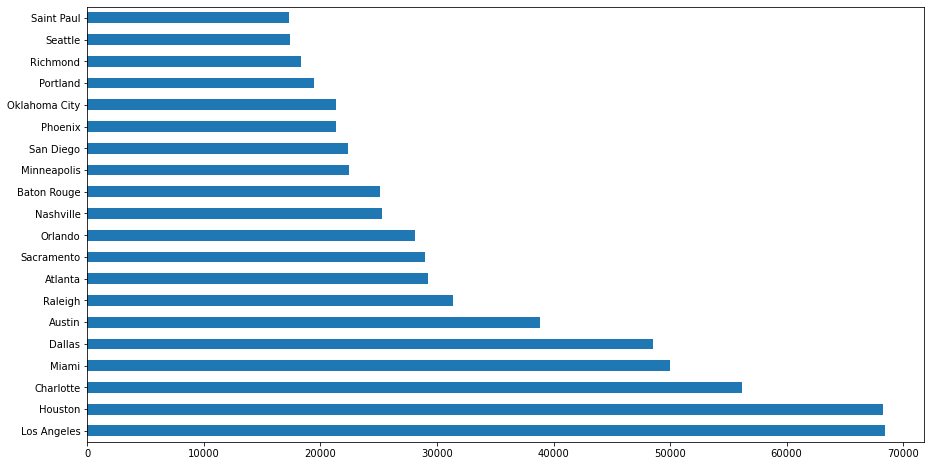

In [50]:
plt.figure(figsize=(15, 8))
cities_by_accident[:20].plot(kind='barh')
plt.show()

From this, we could say that Los Angles has the highest no of accidents occuring, and then Houston, etc.

In [51]:
sns.set_style("darkgrid")

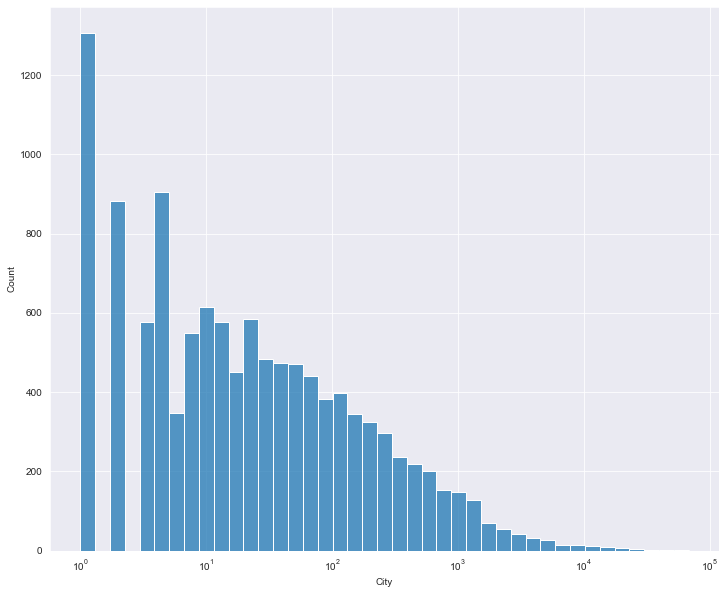

In [59]:
plt.figure(figsize=(12, 10))
sns.histplot(cities_by_accident, log_scale=True)
plt.show()

In [74]:
cities_by_accident[cities_by_accident == 1]

Mize               1
Deepwater          1
San Augustine      1
Star Lake          1
Longbranch         1
                  ..
Elroy              1
Honoraville        1
Singers Glen       1
Lowndesville       1
Horseshoe Beach    1
Name: City, Length: 1306, dtype: int64

Over 1300 cities have reported just one accident

No of Accidents per city decreases exponetially

In [63]:
high_acc_cities = cities_by_accident[cities_by_accident>=1000]
low_acc_cities = cities_by_accident[cities_by_accident<1000]

In [66]:
len(high_acc_cities)/len(cities)

0.04351145038167939

From this, less than 5% of cities have more than 1000 yearly accidents.

<AxesSubplot:xlabel='City', ylabel='Density'>

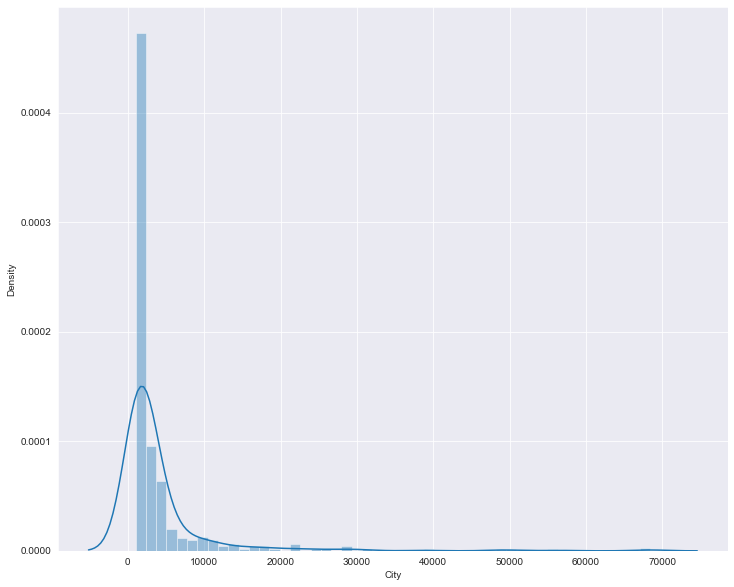

In [70]:
plt.figure(figsize=(12, 10))
sns.distplot(high_acc_cities)

In [75]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

In [77]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [78]:
df.Start_Time[0]

Timestamp('2019-05-21 08:29:55')

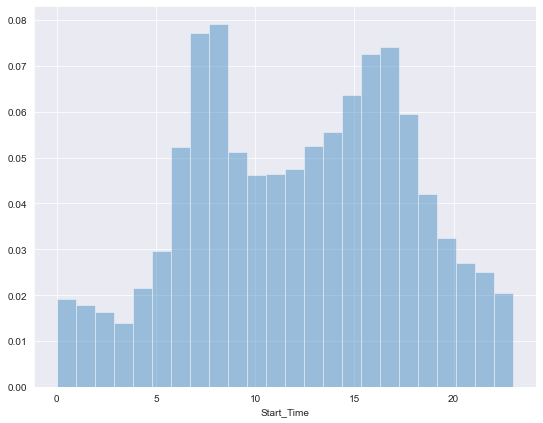

In [86]:
plt.figure(figsize=(9, 7))
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)
plt.show()

~ A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)

~ Next higest percentage is 3 pm to 6 pm in the evening (leaving work).

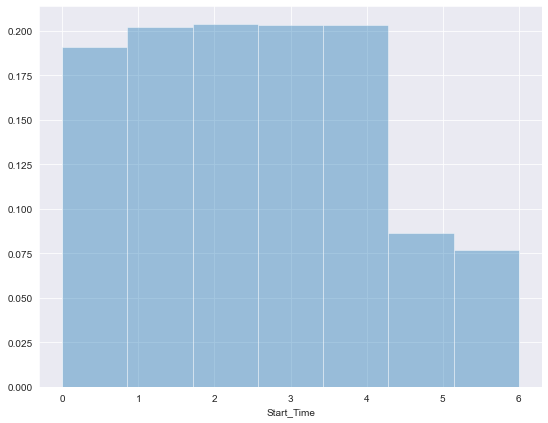

In [88]:
plt.figure(figsize=(9, 7))
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True) 
plt.show()

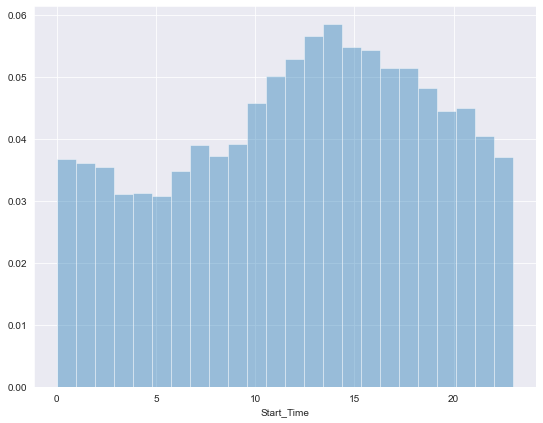

In [92]:
plt.figure(figsize=(9, 7))
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)
plt.show()

On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

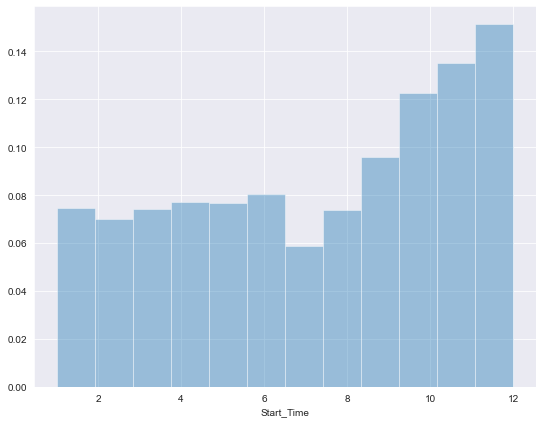

In [94]:
plt.figure(figsize=(9, 7))
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.show()

A high percentage of accidents occur in the month of December (probably it is the vacation season for christmas and new year)

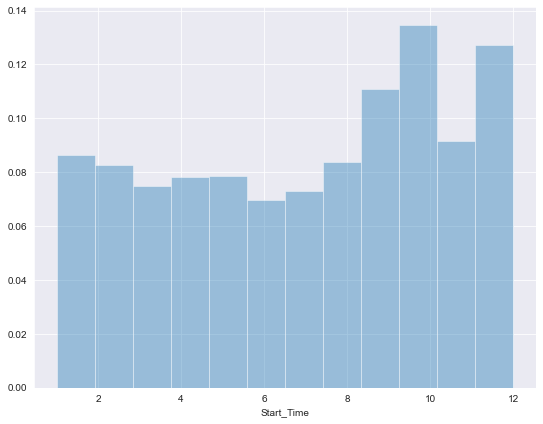

In [104]:
plt.figure(figsize=(9, 7))
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.show()

A high percentage of accidents occur in the month of September to October in the year 2019. 

Next highest is December

In [105]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [106]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

In [107]:
sample_df = df.sample(int(0.1 * len(df)))

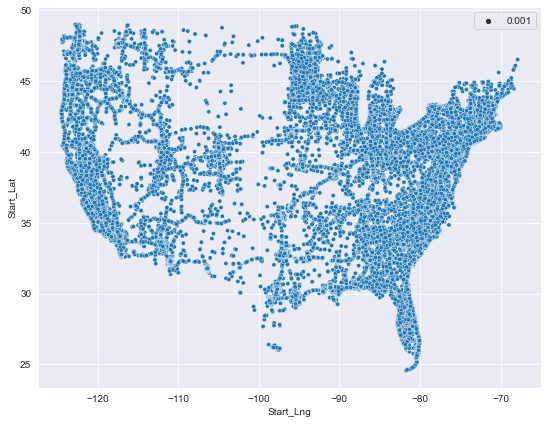

In [110]:
plt.figure(figsize=(9, 7))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)
plt.show()

In [112]:
import folium

In [113]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(34.808868, -82.26915699999998)

In [114]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

2446658    34.019634
782146     40.017658
1265341    27.970620
845902     42.297829
2092629    37.425920
             ...    
1962221    36.035976
1548998    34.914188
928162     36.219601
2869502    32.768982
1556821    41.732487
Name: Start_Lat, Length: 100, dtype: float64
2446658   -117.988121
782146     -75.172241
1265341    -82.620030
845902     -73.240227
2092629   -122.098790
              ...    
1962221    -79.791321
1548998    -82.107170
928162    -119.118439
2869502    -96.822907
1556821    -72.356979
Name: Start_Lng, Length: 100, dtype: float64


In [115]:
from folium.plugins import HeatMap

In [118]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [119]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [120]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map